In [92]:
import pandas as pd 
import seaborn as sns


In [93]:
column_name = ['Id','Name','Age','Weight','m0006','m0612','m1218','f0006','f0612','f1218']

In [94]:
df = pd.read_csv('patient_heart_rate.csv',names = column_name)

In [95]:
df.head(5)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
1,1,Mickéy Mousé,56,70kgs,72,69,71,-,-,-
2,2,Donald Duck,34,154.89lbs,-,-,-,85,84,76
3,3,Mini Mouse,16,NaN,-,-,-,65,69,72
4,4,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-


In [96]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop("Name", axis=1)

In [97]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70kgs,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,154.89lbs,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck


In [98]:
weight = df['Weight']
for i in range(0, len(weight)):
     x = str(weight[i])
     if 'lbs' in x[-3:]:
         x = x[:-3:]
         float_x = float(x)
         y= int (float_x/2.2)
         #y = str(y)
         weight[i]= y
     if 'kgs' in x[-3:]:
         x= x[:-3:]
         float_x = float(x)
         weight[i] = x    

In [99]:
df.rename(columns={'Weight':'Weight_kgs'},inplace=True)

In [100]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,70,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78,78,79,72,-,-,-,Scrooge,McDuck


In [101]:
df.dropna(how='all', inplace=True)

In [102]:
df = df.drop_duplicates(subset = ['Firstname','Lastname','Age','Weight_kgs'])

In [103]:
df.Firstname.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
print(df)

    Id  Age Weight_kgs  m0006  m0612  m1218  f0006  f0612  f1218 Firstname  \
0   Id  Age     Weight  m0006  m0612  m1218  f0006  f0612  f1218      Name   
1    1   56         70     72     69     71      -      -      -     Micky   
2    2   34         70      -      -      -     85     84     76    Donald   
3    3   16        NaN      -      -      -     65     69     72      Mini   
4    4  NaN         78     78     79     72      -      -      -   Scrooge   
5    5   54         90      -      -      -     69    NaN     75      Pink   
6    6   52         85      -      -      -     68     75     72      Huey   
7    7   19         56      -      -      -     71     78     75     Dewey   
8    8   32         78     78     76     75      -      -      -      Scpy   
12  10   12         45      -      -      -     92     95     87     Louie   
13  11  NaN         60     78     75     72      -      -      -     Henry   
14  12   34        NaN     65     67     55      -      -      -

In [104]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [105]:
print(df['Weight_kgs'].dtype)


object


In [106]:
non_numeric_values = df[~df['Weight_kgs'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_values)

    Id  Age Weight_kgs  m0006  m0612  m1218  f0006  f0612  f1218 Firstname  \
0   Id  Age     Weight  m0006  m0612  m1218  f0006  f0612  f1218      Name   
1    1   56         70     72     69     71      -      -      -     Micky   
4    4   34         78     78     79     72      -      -      -   Scrooge   
7    7   19         56      -      -      -     71     78     75     Dewey   
8    8   32         78     78     76     75      -      -      -      Scpy   
12  10   12         45      -      -      -     92     95     87     Louie   
13  11   34         60     78     75     72      -      -      -     Henry   

   Lastname  
0      None  
1      Mous  
4    McDuck  
7    McDuck  
8       Doo  
12   McDuck  
13      Nam  


In [107]:
df['Weight_kgs'] = pd.to_numeric(df['Weight_kgs'], errors='coerce')

# Kiểm tra lại kiểu dữ liệu
print(df['Weight_kgs'].dtype)

float64


In [108]:
median_weight = df['Weight_kgs'].median()
df['Weight_kgs'].fillna(median_weight, inplace=True)

In [109]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

In [110]:
df = pd.melt(df, id_vars=['Id','Age','Weight_kgs','Firstname','Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id','Age','Weight_kgs','Firstname','Lastname'])

In [111]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

In [112]:
df_temp.columns = ['Gender','Lower_hour','Upper_hour']

In [113]:
df = pd.concat([df,df_temp], axis=1)

In [114]:
df = df.drop(['gender_time'], axis=1)

In [115]:
import numpy as np

In [116]:
df = df.replace('-', np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70.0,Micky,Mous,72,m,00,06
16,1,56,70.0,Micky,Mous,69,m,06,12
31,1,56,70.0,Micky,Mous,71,m,12,18
54,10,12,45.0,Louie,McDuck,92,f,00,06
69,10,12,45.0,Louie,McDuck,95,f,06,12
84,10,12,45.0,Louie,McDuck,87,f,12,18
10,11,34,60.0,Henry,Nam,78,m,00,06
25,11,34,60.0,Henry,Nam,75,m,06,12
40,11,34,60.0,Henry,Nam,72,m,12,18
11,12,34,74.0,Michel,Long,65,m,00,06


In [117]:
df['Firstname'].isnull().sum()

3

In [118]:
df['Lastname'].isnull().sum()

9

In [119]:
df['Firstname'].fillna('Unknown', inplace=True)

In [120]:
df['Lastname'].fillna('Unknown', inplace=True)

In [121]:
df = df.reset_index()

In [122]:
df.to_csv('patient_heart_rate_clean.csv')

In [123]:
df = pd.read_csv("patient_heart_rate_clean.csv")

In [124]:
duplicates = df[df.duplicated(subset='Id', keep=False)]

In [125]:
# Cau 1: Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ
df.head(5)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12


In [126]:
df = pd.read_csv('patient_heart_rate_clean.csv')
df.head(5)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12


In [127]:
gender_counts = df['Gender'].value_counts()

In [128]:
duplicates = df[df.duplicated(subset='Id', keep=False)]

In [129]:
print("Duplicate rows based on 'Id':")
print(duplicates)

Duplicate rows based on 'Id':
    Unnamed: 0  index  Id  Age  Weight_kgs Firstname Lastname PulseRate  \
0            0      1   1   56        70.0     Micky     Mous        72   
1            1     16   1   56        70.0     Micky     Mous        69   
2            2     31   1   56        70.0     Micky     Mous        71   
3            3     54  10   12        45.0     Louie   McDuck        92   
4            4     69  10   12        45.0     Louie   McDuck        95   
5            5     84  10   12        45.0     Louie   McDuck        87   
6            6     10  11   34        60.0     Henry      Nam        78   
7            7     25  11   34        60.0     Henry      Nam        75   
8            8     40  11   34        60.0     Henry      Nam        72   
9            9     11  12   34        74.0    Michel     Long        65   
10          10     26  12   34        74.0    Michel     Long        67   
11          11     41  12   34        74.0    Michel     Long        5

In [130]:
df_grouped = df.groupby('Id', as_index=False).mean()

In [131]:
print("Data after handling duplicates:")
print(df_grouped.head())

Data after handling duplicates:
   Id  Unnamed: 0  index  Weight_kgs  Lower_hour  Upper_hour
0   1         1.0   16.0        70.0         6.0        12.0
1  10         4.0   69.0        45.0         6.0        12.0
2  11         7.0   25.0        60.0         6.0        12.0
3  12        10.0   26.0        74.0         6.0        12.0
4  13        13.0   72.0        74.0         6.0        12.0


In [132]:
df_grouped.to_csv('cleaned_patient_data.csv', index=False)

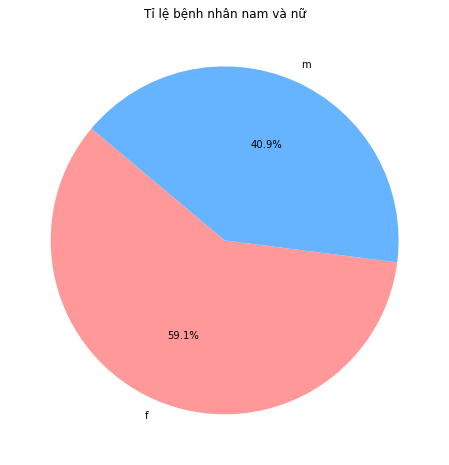

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Thêm tiêu đề
plt.title('Tỉ lệ bệnh nhân nam và nữ')

# Hiển thị biểu đồ
plt.show()

In [134]:
df = pd.read_csv('patient_heart_rate_clean.csv')

In [135]:
df.head(10)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12
5,5,84,10,12,45.0,Louie,McDuck,87,f,12,18
6,6,10,11,34,60.0,Henry,Nam,78,m,0,6
7,7,25,11,34,60.0,Henry,Nam,75,m,6,12
8,8,40,11,34,60.0,Henry,Nam,72,m,12,18
9,9,11,12,34,74.0,Michel,Long,65,m,0,6


In [136]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [137]:
df.head(10)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6,Micky Mous
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12,Micky Mous
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18,Micky Mous
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6,Louie McDuck
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12,Louie McDuck
5,5,84,10,12,45.0,Louie,McDuck,87,f,12,18,Louie McDuck
6,6,10,11,34,60.0,Henry,Nam,78,m,0,6,Henry Nam
7,7,25,11,34,60.0,Henry,Nam,75,m,6,12,Henry Nam
8,8,40,11,34,60.0,Henry,Nam,72,m,12,18,Henry Nam
9,9,11,12,34,74.0,Michel,Long,65,m,0,6,Michel Long


In [138]:
#Cau 3:Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân

In [139]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [140]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df[['Fullname', 'Age']].dropna().drop_duplicates()

In [141]:
df_unique = df[['Fullname', 'Age']].drop_duplicates()

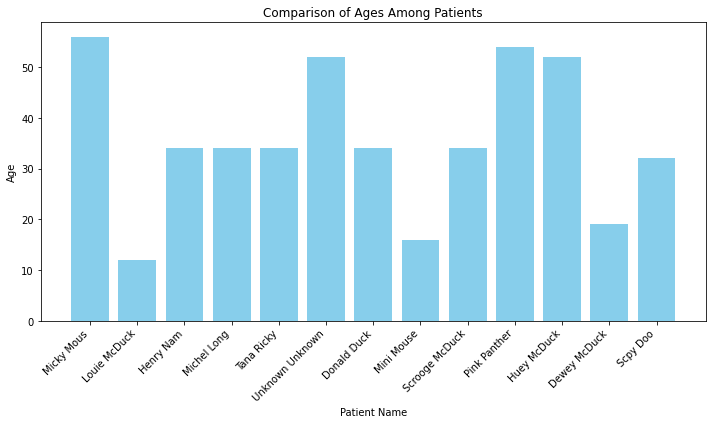

In [142]:
import matplotlib.pyplot as plt
if df_cleaned.empty:
    print("Error: No valid data to plot after cleaning. Please check your input data.")
else:
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df_cleaned['Fullname'], df_cleaned['Age'], color='skyblue')
    plt.xlabel('Patient Name')
    plt.ylabel('Age')
    plt.title('Comparison of Ages Among Patients')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [143]:
# Cau 4: Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân

In [144]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [145]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [146]:
avg_pulse_rate = df.groupby('Fullname')['PulseRate'].mean().reset_index()

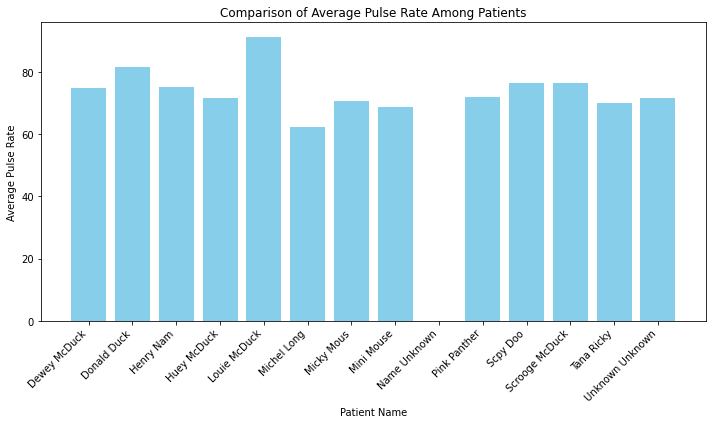

In [147]:
if avg_pulse_rate.empty:
    print("Error: No valid data to plot. Please check your input data.")
else:
    # Plotting the bar chart for average PulseRate
    plt.figure(figsize=(10, 6))
    plt.bar(avg_pulse_rate['Fullname'], avg_pulse_rate['PulseRate'], color='skyblue')
    plt.xlabel('Patient Name')
    plt.ylabel('Average Pulse Rate')
    plt.title('Comparison of Average Pulse Rate Among Patients')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [148]:
#Cau 5:Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính

In [149]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [150]:
time_gender_pulse = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().reset_index()

In [151]:
time_labels = {0: '00-06', 6: '06-12', 12: '12-18'}

In [152]:
time_gender_pulse['Time Interval'] = time_gender_pulse['Lower_hour'].map(time_labels)

In [153]:
pivot_df = time_gender_pulse.pivot(index='Time Interval', columns='Gender', values='PulseRate')

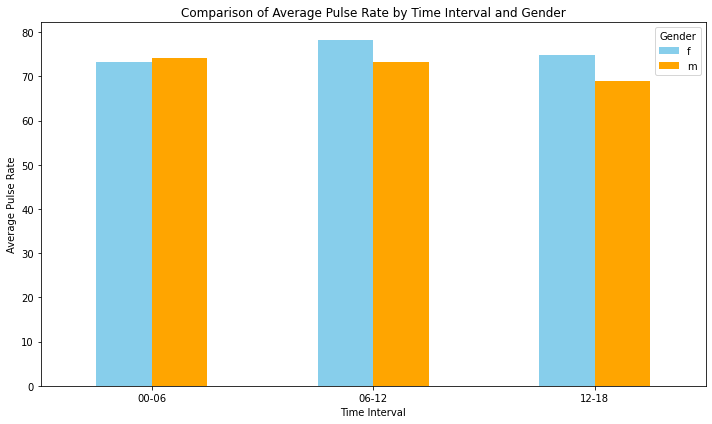

In [154]:
pivot_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.xlabel('Time Interval')
plt.ylabel('Average Pulse Rate')
plt.title('Comparison of Average Pulse Rate by Time Interval and Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [155]:
#Cau 6: Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim

In [156]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [157]:
avg_stats = df.groupby('Id').agg({'Age': 'mean', 'PulseRate': 'mean'}).reset_index()

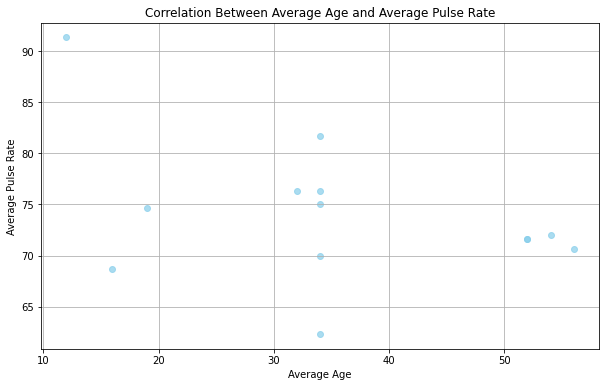

In [158]:
if avg_stats.empty:
    print("Error: No valid data to plot. Please check your input data.")
else:
    # Plotting the scatter plot for average Age and average PulseRate
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_stats['Age'], avg_stats['PulseRate'], color='skyblue', alpha=0.7)
    plt.xlabel('Average Age')
    plt.ylabel('Average Pulse Rate')
    plt.title('Correlation Between Average Age and Average Pulse Rate')
    plt.grid(True)

    # Show the plot
    plt.show()

In [159]:
#Cau 7:Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính.

In [160]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [161]:
time_gender_pulse = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().reset_index()

In [162]:
time_labels = {0: '00-06', 6: '06-12', 12: '12-18'}

In [163]:
time_gender_pulse['Time Interval'] = time_gender_pulse['Lower_hour'].map(time_labels)

In [164]:
time_gender_pulse.sort_values(by='Lower_hour', inplace=True)

In [165]:
male_data = time_gender_pulse[time_gender_pulse['Gender'] == 'm']
female_data = time_gender_pulse[time_gender_pulse['Gender'] == 'f']

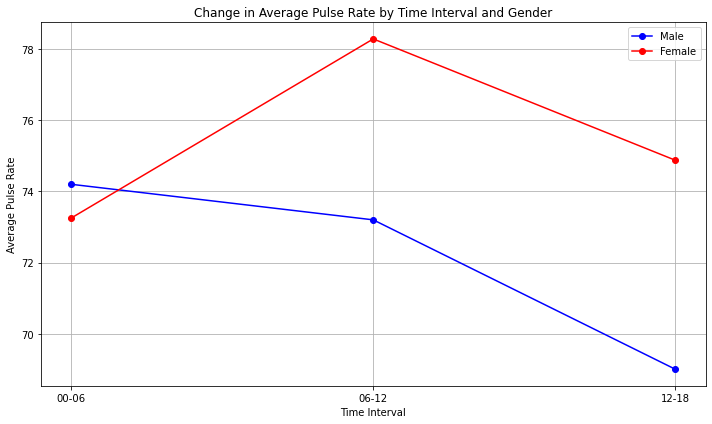

In [166]:
plt.figure(figsize=(10, 6))

plt.plot(male_data['Time Interval'], male_data['PulseRate'], marker='o', linestyle='-', color='blue', label='Male')
plt.plot(female_data['Time Interval'], female_data['PulseRate'], marker='o', linestyle='-', color='red', label='Female')

plt.xlabel('Time Interval')
plt.ylabel('Average Pulse Rate')
plt.title('Change in Average Pulse Rate by Time Interval and Gender')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()